

---


# Imports

Requisite libraries, including `numpy`, `pandas`, `os`, `random`, `shutil`, `tqdm`, `matplotlib.image`, `matplotlib.pyplot`, `PIL`, `ImageDataGenerator`, `load_img`, `img_to_array`, `Sequential`, `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense`, and `Dropout`, have been imported. Additionally, `%matplotlib inline` is employed for inline plotting. These libraries are employed to support a range of tasks, encompassing data manipulation, image processing, plotting, and construction of neural network models.

In [1]:
import numpy as np
import pandas as pd
import os
import random
import shutil
from tqdm import tqdm
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



2023-08-26 04:07:57.021832: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-26 04:07:57.461416: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-08-26 04:07:57.461457: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-08-26 04:07:57.461462: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv



---


# Basic EDA

The display showcases the contents of the base directory, with the items within the directory being listed through utilization of the `os.listdir` function.

In [2]:
dir = '/home/foc-dba-38-0026-c/RootCode/Datathon-Dataset'

print("Contents of base directory:")
print(os.listdir(dir))

Contents of base directory:
['category1_tumor', 'no_tumor', 'category2_tumor', 'category3_tumor']


A quick review of the dataset is conducted, and an examination is carried out to identify any undesirable file extensions within the classes.

In [4]:
contents_of_no_tumor_dir = os.listdir(f'{dir}/no_tumor')
image_extensions = set(os.path.splitext(file)[1].lower() for file in contents_of_no_tumor_dir)
print("Image extensions in no_tumor directory:", image_extensions)

Image extensions in no_tumor directory: {'.jpg'}


In [5]:
contents_of_category1_tumor_dir = os.listdir(f'{dir}/category1_tumor')
image_extensions = set(os.path.splitext(file)[1].lower() for file in contents_of_category1_tumor_dir)
print("Image extensions in category1_tumor directory:", image_extensions)

Image extensions in category1_tumor directory: {'.jpg'}


In [6]:
contents_of_category2_tumor_dir = os.listdir(f'{dir}/category2_tumor')
image_extensions = set(os.path.splitext(file)[1].lower() for file in contents_of_category2_tumor_dir)
print("Image extensions in category2_tumor directory:", image_extensions)

Image extensions in category2_tumor directory: {'.jpg'}


In [7]:
contents_of_category3_tumor_dir = os.listdir(f'{dir}/category3_tumor')
image_extensions = set(os.path.splitext(file)[1].lower() for file in contents_of_category3_tumor_dir)
print("Image extensions in category3_tumor directory:", image_extensions)

Image extensions in category3_tumor directory: {'.jpg'}


Subdirectories are identified within a directory, being ordered based on a specified preference. The number of image files in each subdirectory is tallied, and this information is subsequently printed out for each subdirectory.

In [3]:
subdirectories = [subdir for subdir in os.listdir(dir) if os.path.isdir(os.path.join(dir, subdir))]
desired_order = ['no_tumor', 'category1_tumor', 'category2_tumor', 'category3_tumor']
subdirectories = sorted(subdirectories, key=lambda x: desired_order.index(x))

# Count the number of image files in each subdirectory
for subdir in subdirectories:
    sub_dir_path = os.path.join(dir, subdir)
    image_files = [file for file in os.listdir(sub_dir_path) if file.lower().endswith(('.jpg'))]
    num_images = len(image_files)

    print(f"Subdirectory: {subdir}, Number of images: {num_images}")


Subdirectory: no_tumor, Number of images: 490
Subdirectory: category1_tumor, Number of images: 916
Subdirectory: category2_tumor, Number of images: 927
Subdirectory: category3_tumor, Number of images: 891


An image imbalance is observed in the dataset, with the number of images in the "No tumor" class being lower than that in the other classes, necessitating the need for its handling.

A dictionary containing unique pixel heights and widths for images within each class is generated. The iteration through classes, processing of image files, calculation of distinct pixel dimensions, and display of the collected information for each class are performed by the code.

In [53]:
# Create a dictionary to store unique pixel heights and widths for each class
class_pixel_info = {class_name: {'heights': set(), 'widths': set()} for class_name in desired_order}

# Iterate through the classes in the desired order
for class_name in desired_order:
    class_dir = os.path.join(dir, class_name)
    image_files = [file for file in os.listdir(class_dir) if file.lower().endswith(('.jpg'))]

    # Calculate unique pixel heights and widths for each image in the class
    for image_file in image_files:
        image_path = os.path.join(class_dir, image_file)
        with Image.open(image_path) as img:
            width, height = img.size
            class_pixel_info[class_name]['heights'].add(height)
            class_pixel_info[class_name]['widths'].add(width)

# Print unique pixel heights and widths for each class
for class_name, pixel_info in class_pixel_info.items():
    print(f"Class: {class_name}")
    print("Unique Pixel Heights:", pixel_info['heights'])
    print("Unique Pixel Widths:", pixel_info['widths'])
    print()


Class: no_tumor
Unique Pixel Heights: {1024, 513, 512, 519, 528, 540, 1075, 575, 583, 585, 592, 600, 602, 605, 613, 630, 649, 664, 674, 680, 686, 693, 198, 200, 201, 714, 203, 202, 717, 207, 208, 720, 210, 211, 212, 213, 214, 725, 216, 217, 218, 215, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 231, 232, 233, 234, 235, 236, 745, 750, 239, 240, 242, 243, 244, 247, 248, 249, 250, 251, 252, 253, 256, 257, 258, 259, 260, 261, 262, 263, 264, 777, 268, 269, 270, 781, 273, 274, 275, 277, 278, 280, 286, 290, 293, 294, 295, 300, 301, 302, 304, 309, 310, 824, 315, 830, 832, 320, 326, 328, 332, 848, 851, 344, 350, 351, 357, 872, 361, 366, 380, 398, 400, 406, 415, 417, 418, 1446, 424, 442, 443, 444, 449, 450, 452, 469, 470, 480, 483, 484, 485, 486, 488, 489, 490, 496, 500, 501, 502, 504, 506, 508, 509}
Unique Pixel Widths: {1024, 512, 528, 550, 562, 590, 600, 605, 622, 626, 629, 630, 642, 648, 652, 655, 680, 200, 201, 202, 203, 204, 717, 205, 207, 208, 209, 210, 211, 212, 724, 214, 206, 728, 

Apparently, images originate from varying sizes, and there are drastic changes in pixel heights and widths. Images with abnormally high pixel ratios are being visualized.

Images in various classes are being analyzed based on their aspect ratios, categorized as either portrait or landscape, and subsequently, a random subset of these images is visualized for each class. Since a significant difference in image height and width can lead to the destruction of image features when rescaling and resizing.

Class: category1_tumor
Number of portrait images: 3
Number of landscape images: 0
Visualizing portrait images:


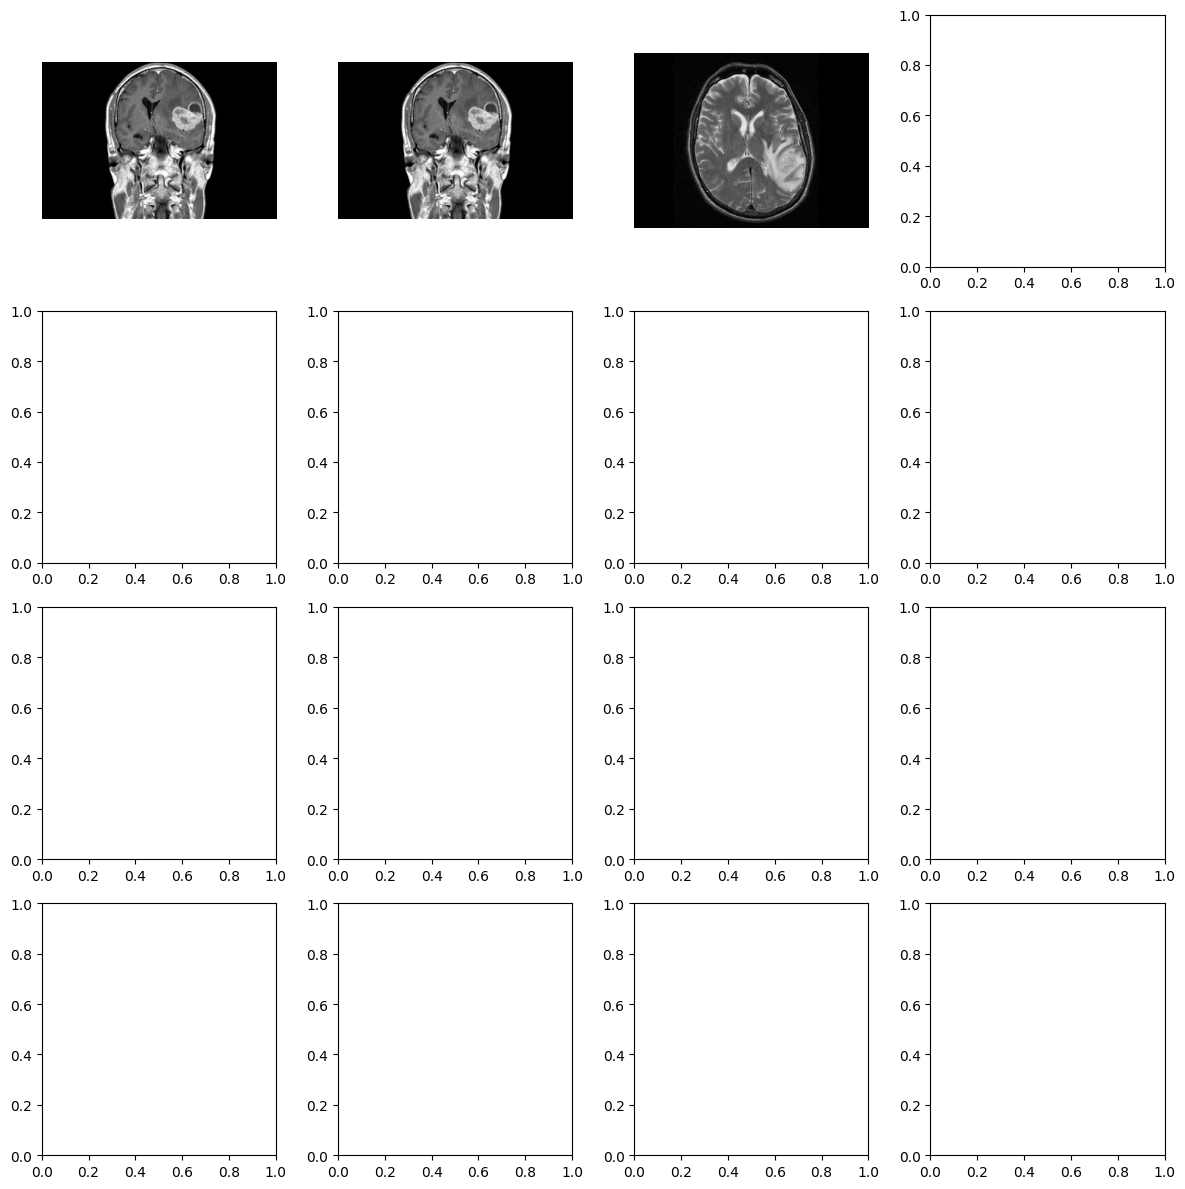

Class: no_tumor
Number of portrait images: 18
Number of landscape images: 6
Visualizing portrait images:


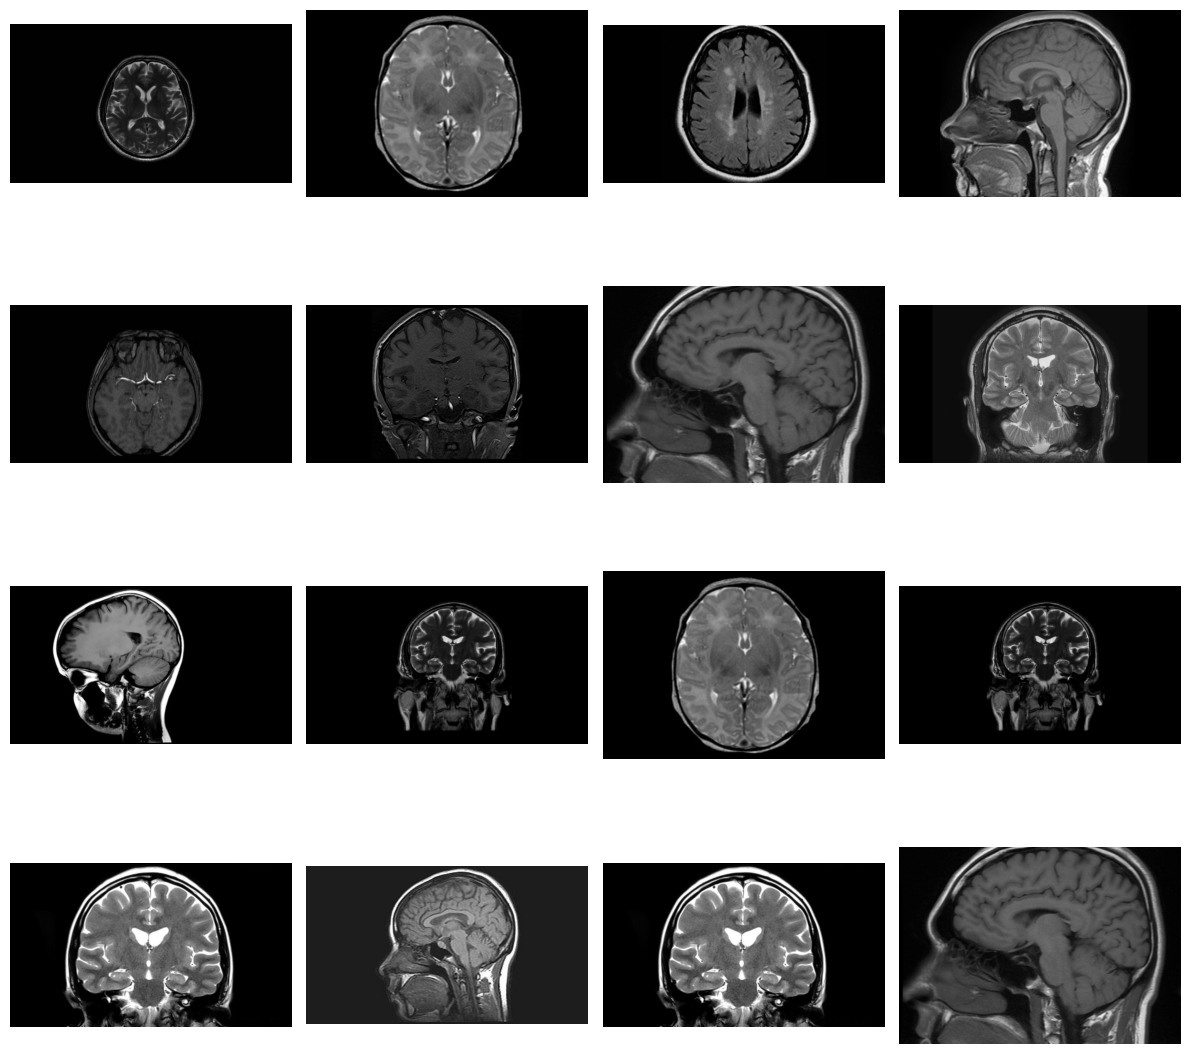

Visualizing landscape images:


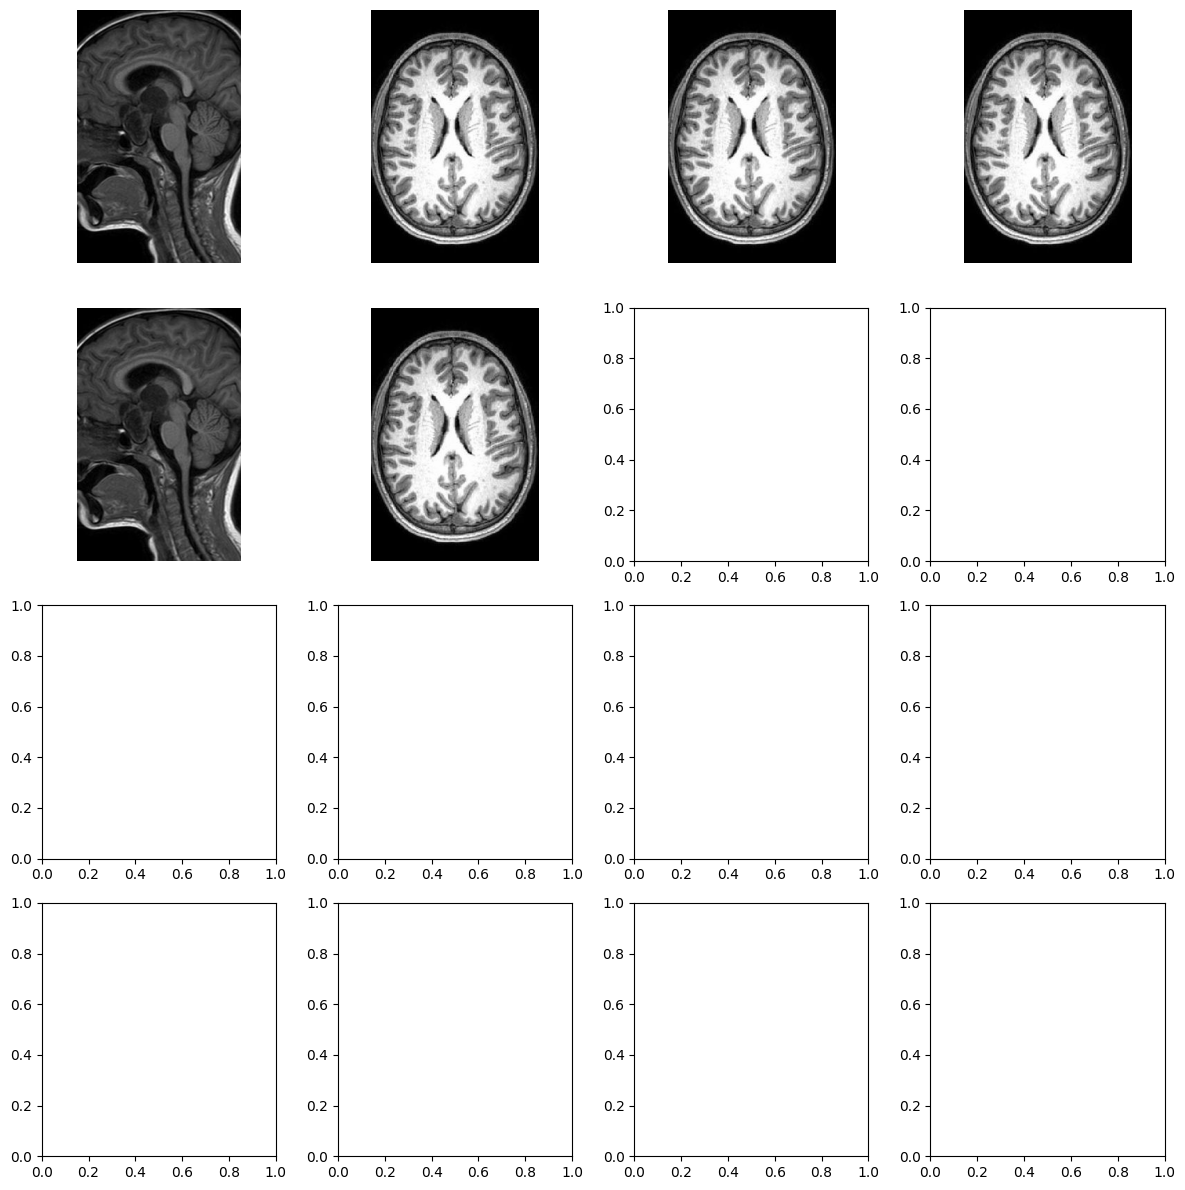

Class: category2_tumor
Number of portrait images: 11
Number of landscape images: 0
Visualizing portrait images:


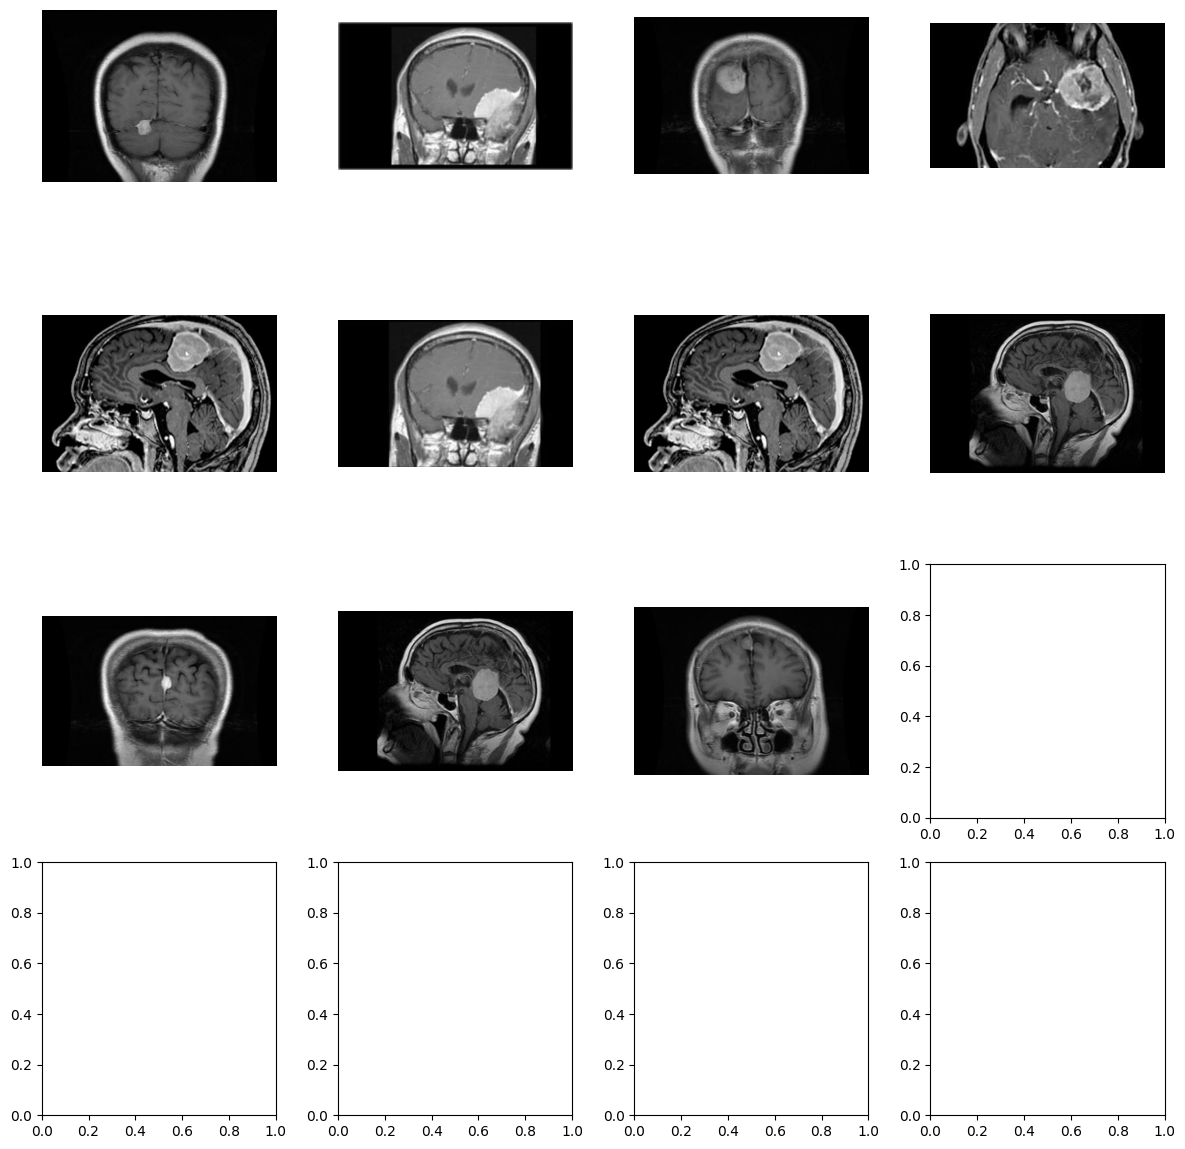

Class: category3_tumor
Number of portrait images: 0
Number of landscape images: 0


In [54]:
portrait_threshold = 1.3  # Define a threshold for portrait aspect ratio
landscape_threshold = 0.7  # Define a threshold for landscape aspect ratio

# Function to count images with portrait or landscape aspect ratios
def count_images(images_dir, portrait_threshold, landscape_threshold):
    portrait_images = []
    landscape_images = []
    for filename in os.listdir(images_dir):
        if filename.endswith('.jpg'):  # Assuming images are in jpg format
            image_path = os.path.join(images_dir, filename)
            with Image.open(image_path) as img:
                width, height = img.size
                aspect_ratio = width / height
                if aspect_ratio > portrait_threshold:
                    portrait_images.append(image_path)
                elif aspect_ratio < landscape_threshold:
                    landscape_images.append(image_path)
    return portrait_images, landscape_images

# Function to visualize a random sample of images
def visualize_images(image_paths, num_images=16):
    random_images = random.sample(image_paths, min(num_images, len(image_paths)))
    fig, axes = plt.subplots(4, 4, figsize=(12, 12))
    for i, ax in enumerate(axes.flat):
        if i < len(random_images):
            image_path = random_images[i]
            image = Image.open(image_path)
            ax.imshow(image)
            ax.axis('off')
    plt.tight_layout()
    plt.show()

# Iterate over classes, count images, and visualize portrait and landscape images
for class_name in classes:
    class_dir = os.path.join(dir, class_name)
    portrait_images, landscape_images = count_images(class_dir, portrait_threshold, landscape_threshold)
    
    print(f"Class: {class_name}")
    print(f"Number of portrait images: {len(portrait_images)}")
    print(f"Number of landscape images: {len(landscape_images)}")
    
    if portrait_images:
        print("Visualizing portrait images:")
        visualize_images(portrait_images)
    
    if landscape_images:
        print("Visualizing landscape images:")
        visualize_images(landscape_images)



---


# Data Preprocessing

The path for storing resized images is designated as `resized_dir`. If the output directory does not already exist, it is created at this location.

In [3]:
# Path to store resized images
resized_dir = '/home/foc-dba-38-0026-c/RootCode/Datathon_Resized'

# Create the output directory if it doesn't exist
os.makedirs(resized_dir, exist_ok=True)


Images within different classes are processed by categorizing them based on aspect ratios, resizing the remaining images to a target size, and saving the resized images in corresponding directories.

In [56]:
classes = ['category1_tumor', 'no_tumor', 'category2_tumor', 'category3_tumor']
portrait_threshold = 1.3  # Define a threshold for portrait aspect ratio
landscape_threshold = 0.7  # Define a threshold for landscape aspect ratio
target_size = (248, 248)  # Target size for resizing

# Function to count images with portrait or landscape aspect ratios
def count_images(images_dir, portrait_threshold, landscape_threshold):
    portrait_images = []
    landscape_images = []
    other_images = []
    for filename in os.listdir(images_dir):
        if filename.endswith('.jpg'):  
            image_path = os.path.join(images_dir, filename)
            with Image.open(image_path) as img:
                width, height = img.size
                aspect_ratio = width / height
                if aspect_ratio > portrait_threshold:
                    portrait_images.append(image_path)
                elif aspect_ratio < landscape_threshold:
                    landscape_images.append(image_path)
                else:
                    other_images.append(image_path)
    return other_images

# Function to resize images to target size
def resize_image(image_path, target_size):
    with Image.open(image_path) as img:
        resized_img = ImageOps.pad(img, target_size)
        return resized_img

# Iterate over classes, count images, and resize remaining images
for class_name in classes:
    class_dir = os.path.join(dir, class_name)
    remaining_images = count_images(class_dir, portrait_threshold, landscape_threshold)
    
    print(f"Class: {class_name}")
    print(f"Number of remaining images: {len(remaining_images)}")
    
    resized_class_dir = os.path.join(resized_dir, class_name)
    os.makedirs(resized_class_dir, exist_ok=True)
    
    for image_path in remaining_images:
        resized_img = resize_image(image_path, target_size)
        resized_img.save(os.path.join(resized_class_dir, os.path.basename(image_path)))
    
    print(f"Resized images saved in: {resized_class_dir}")

Class: category1_tumor
Number of remaining images: 913
Resized images saved in: /home/foc-dba-38-0026-c/RootCode/Datathon_Resized/category1_tumor
Class: no_tumor
Number of remaining images: 466
Resized images saved in: /home/foc-dba-38-0026-c/RootCode/Datathon_Resized/no_tumor
Class: category2_tumor
Number of remaining images: 916
Resized images saved in: /home/foc-dba-38-0026-c/RootCode/Datathon_Resized/category2_tumor
Class: category3_tumor
Number of remaining images: 891
Resized images saved in: /home/foc-dba-38-0026-c/RootCode/Datathon_Resized/category3_tumor


In [5]:
base_dir = '/home/foc-dba-38-0026-c/RootCode/Datathon_Resized'

A dictionary is created and populated with unique pixel heights and widths for images across different classes. The code traverses through the classes, processes image files, calculates distinctive pixel dimensions, and subsequently prints this information for each class.

In [59]:
# Create a dictionary to store unique pixel heights and widths for each class
class_pixel_info = {class_name: {'heights': set(), 'widths': set()} for class_name in desired_order}

# Iterate through the classes in the desired order
for class_name in desired_order:
    class_dir = os.path.join(base_dir, class_name)
    image_files = [file for file in os.listdir(class_dir) if file.lower().endswith(('.jpg'))]

    # Calculate unique pixel heights and widths for each image in the class
    for image_file in image_files:
        image_path = os.path.join(class_dir, image_file)
        with Image.open(image_path) as img:
            width, height = img.size
            class_pixel_info[class_name]['heights'].add(height)
            class_pixel_info[class_name]['widths'].add(width)

# Print unique pixel heights and widths for each class
for class_name, pixel_info in class_pixel_info.items():
    print(f"Class: {class_name}")
    print("Unique Pixel Heights:", pixel_info['heights'])
    print("Unique Pixel Widths:", pixel_info['widths'])
    print()


Class: no_tumor
Unique Pixel Heights: {248}
Unique Pixel Widths: {248}

Class: category1_tumor
Unique Pixel Heights: {248}
Unique Pixel Widths: {248}

Class: category2_tumor
Unique Pixel Heights: {248}
Unique Pixel Widths: {248}

Class: category3_tumor
Unique Pixel Heights: {248}
Unique Pixel Widths: {248}



In [65]:
augmentation_generator = ImageDataGenerator(
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.05,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [66]:
class_to_oversample = 'no_tumor'
class_dir = os.path.join(base_dir, class_to_oversample)
augmented_dir = os.path.join(base_dir, f"{class_to_oversample}_augmented")
os.makedirs(augmented_dir, exist_ok=True)

# Load existing images
image_paths = [os.path.join(class_dir, filename) for filename in os.listdir(class_dir) if filename.endswith('.jpg')]

num_original_images = len(image_paths)
desired_total_images = num_original_images + 450

# Generate and save augmented images
for i in tqdm(range(num_original_images, desired_total_images)):
    random_image_path = random.choice(image_paths)
    img = Image.open(random_image_path)
    img = img.convert('L')  # Convert to grayscale

    # Convert image to array
    img_array = np.array(img)

    # Reshape for augmentation
    img_array = img_array.reshape((1,) + img_array.shape + (1,))

    # Generate augmented image
    augmented_img = augmentation_generator.flow(img_array, batch_size=1, save_to_dir=augmented_dir, save_prefix='aug', save_format='jpg')
    augmented_img = next(augmented_img)[0].astype('uint8')

    # Save the augmented image
    new_image_name = f"aug_{i:03d}.jpg"  # Using :03d ensures leading zeros
    new_image_path = os.path.join(augmented_dir, new_image_name)
    im = Image.fromarray(augmented_img.squeeze(), mode='L')
    im.save(new_image_path)

print(f"{desired_total_images - num_original_images} augmented images generated for {class_to_oversample} class.")


100%|███████████████████████████████████████████████████| 450/450 [00:01<00:00, 333.68it/s]

450 augmented images generated for no_tumor class.


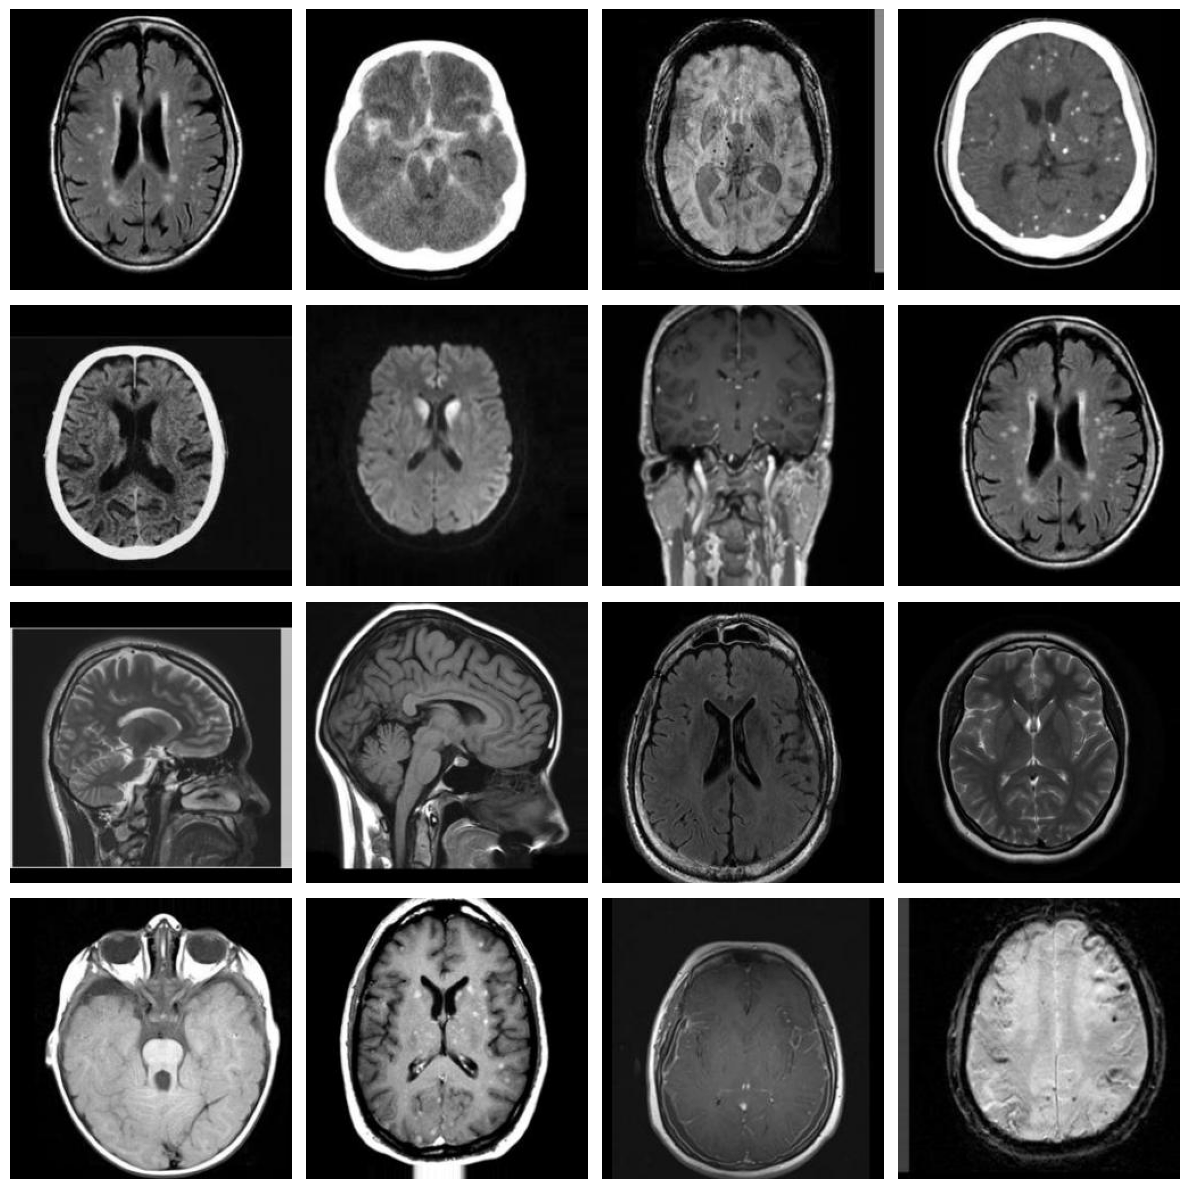

In [71]:
augmented_dir = os.path.join(base_dir, 'no_tumor_augmented')

# Get a list of image paths in the augmented directory
augmented_image_paths = [os.path.join(augmented_dir, filename) for filename in os.listdir(augmented_dir) if filename.endswith('.jpg')]

# Randomly select 16 images from the list
sample_augmented_images = random.sample(augmented_image_paths, 16)

# Visualize the sample images
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
for i, ax in enumerate(axes.flat):
    image_path = sample_augmented_images[i]
    image = Image.open(image_path)
    ax.imshow(image, cmap='gray') 
    ax.axis('off')
plt.tight_layout()
plt.show()

In [73]:
subdirectories = [subdir for subdir in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, subdir))]
desired_order = ['no_tumor', 'category1_tumor', 'category2_tumor', 'category3_tumor','no_tumor_augmented']
subdirectories = sorted(subdirectories, key=lambda x: desired_order.index(x))

# Count the number of image files in each subdirectory
for subdir in subdirectories:
    sub_dir_path = os.path.join(base_dir, subdir)
    image_files = [file for file in os.listdir(sub_dir_path) if file.lower().endswith(('.jpg'))]
    num_images = len(image_files)

    print(f"Subdirectory: {subdir}, Number of images: {num_images}")

Subdirectory: no_tumor, Number of images: 466
Subdirectory: category1_tumor, Number of images: 913
Subdirectory: category2_tumor, Number of images: 916
Subdirectory: category3_tumor, Number of images: 891
Subdirectory: no_tumor_augmented, Number of images: 894


In [74]:
no_tumor_oversampled_dir = os.path.join(base_dir, 'no_tumor_augmented')
no_tumor_dir = os.path.join(base_dir, 'no_tumor')

# List all the image files in the 'no_tumor_oversampled' directory
oversampled_images = os.listdir(no_tumor_oversampled_dir)

# Randomly select 450 images from the oversampled images list
selected_images = random.sample(oversampled_images, 450)

# Copy or move the selected images to the 'no_tumor' directory
for image_name in selected_images:
    src_path = os.path.join(no_tumor_oversampled_dir, image_name)
    dst_path = os.path.join(no_tumor_dir, image_name)
    shutil.move(src_path, dst_path)  # Move the image

print("Selected images have been copied/moved to the 'no_tumor' directory.")


Selected images have been copied/moved to the 'no_tumor' directory.


In [7]:
subdirectories = [subdir for subdir in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, subdir))]
desired_order = ['no_tumor', 'category1_tumor', 'category2_tumor', 'category3_tumor','no_tumor_augmented']
subdirectories = sorted(subdirectories, key=lambda x: desired_order.index(x))

# Count the number of image files in each subdirectory
for subdir in subdirectories:
    sub_dir_path = os.path.join(base_dir, subdir)
    image_files = [file for file in os.listdir(sub_dir_path) if file.lower().endswith(('.jpg'))]
    num_images = len(image_files)

    print(f"Subdirectory: {subdir}, Number of images: {num_images}")

Subdirectory: no_tumor, Number of images: 916
Subdirectory: category1_tumor, Number of images: 913
Subdirectory: category2_tumor, Number of images: 916
Subdirectory: category3_tumor, Number of images: 891
Subdirectory: no_tumor_augmented, Number of images: 444


In [6]:
# Input Path
dataset_path = base_dir

# Output Path for data
output_path = "/home/foc-dba-38-0026-c/RootCode/Datathon_AltShiftTech"

In [88]:
# 80% of data is selected for training and 20% for validating
validation_size = 0.2

# Create training and validating classes
classes = ['no_tumor', 'category1_tumor', 'category2_tumor', 'category3_tumor']
for class_name in classes:
    os.makedirs(os.path.join(output_path, "train", class_name), exist_ok=True)
    os.makedirs(os.path.join(output_path, "validation", class_name), exist_ok=True)

# Get the list of all image files in the dataset folder for each class
all_images = {class_name: [f for f in os.listdir(os.path.join(dataset_path, class_name)) if f.lower().endswith('.jpg')] for class_name in classes}

# Shuffle the lists of image files for each class
for class_name in classes:
    random.shuffle(all_images[class_name])

# Calculate the number of images to use for the validation set for each class
num_validation = {class_name: int(len(all_images[class_name]) * validation_size) for class_name in classes}

# Move the images to the appropriate train and validation folders for each class
for class_name in classes:
    for i, image_name in tqdm(enumerate(all_images[class_name]), desc=f"Moving {class_name} images"):
        src_path = os.path.join(dataset_path, class_name, image_name)
        if i < num_validation[class_name]:
            dst_path = os.path.join(output_path, "validation", class_name, image_name)
        else:
            dst_path = os.path.join(output_path, "train", class_name, image_name)
        
        # Convert to grayscale if not already
        img = Image.open(src_path)
        if img.mode != 'L':
            img = img.convert('L')
        img.save(dst_path)
        
print("Data splitting and conversion to grayscale completed.")


Moving no_tumor images: 916it [00:00, 2419.05it/s]
Moving category1_tumor images: 913it [00:00, 2235.03it/s]
Moving category2_tumor images: 916it [00:00, 2206.96it/s]
Moving category3_tumor images: 891it [00:00, 2097.20it/s]

Data splitting and conversion to grayscale completed.


In [7]:
train_dir = os.path.join(output_path, 'train')
validation_dir = os.path.join(output_path, 'validation')

# Directory with training images
train_no_tumor_dir = os.path.join(train_dir, 'no_tumor')
train_category1_tumor_dir = os.path.join(train_dir, 'category1_tumor')
train_category2_tumor_dir = os.path.join(train_dir, 'category2_tumor')
train_category3_tumor_dir = os.path.join(train_dir, 'category3_tumor')


# Directory with validation pictures
validation_no_tumor_dir = os.path.join(validation_dir, 'no_tumor')
validation_category1_tumor_dir = os.path.join(validation_dir, 'category1_tumor')
validation_category2_tumor_dir = os.path.join(validation_dir, 'category2_tumor')
validation_category3_tumor_dir = os.path.join(validation_dir, 'category3_tumor')

In [90]:
def count_images_in_folder(folder_path):
    return sum(1 for file in os.listdir(folder_path) if file.endswith(('.jpg', '.png')))

# Define directory paths
directories = {
    'Train No Tumor Images': train_no_tumor_dir,
    'Train Category 1 Tumor Images': train_category1_tumor_dir,
    'Train Category 2 Tumor Images': train_category2_tumor_dir,
    'Train Category 3 Tumor Images': train_category3_tumor_dir,
    '\nValidation No Tumor Images': validation_no_tumor_dir,
    'Validation Category 1 Tumor Images': validation_category1_tumor_dir,
    'Validation Category 2 Tumor Images': validation_category2_tumor_dir,
    'Validation Category 3 Tumor Images': validation_category3_tumor_dir
}

# Count and print the image counts for each directory
for directory_name, directory_path in directories.items():
    image_count = count_images_in_folder(directory_path)
    print(f"{directory_name}: {image_count}")

Train No Tumor Images: 733
Train Category 1 Tumor Images: 731
Train Category 2 Tumor Images: 733
Train Category 3 Tumor Images: 713

Validation No Tumor Images: 183
Validation Category 1 Tumor Images: 182
Validation Category 2 Tumor Images: 183
Validation Category 3 Tumor Images: 178


In [91]:
train_no_tumor_fnames = os.listdir( train_no_tumor_dir )
train_category1_tumor_fnames = os.listdir( train_category1_tumor_dir )
train_category2_tumor_fnames = os.listdir( train_category2_tumor_dir )
train_category3_tumor_fnames = os.listdir( train_category3_tumor_dir )

print(train_no_tumor_fnames[:10])
print(train_category1_tumor_fnames[:10])
print(train_category2_tumor_fnames[:10])
print(train_category3_tumor_fnames[:10])

['nt_img (389).jpg', 'nt_img (487).jpg', 'nt_img (180).jpg', 'nt_img (476).jpg', 'aug_0_8636.jpg', 'aug_0_7879.jpg', 'nt_img (216).jpg', 'nt_img (415).jpg', 'nt_img (411).jpg', 'nt_img (450).jpg']
['gt_img (799).jpg', 'gt_img (363).jpg', 'gt_img (352).jpg', 'gt_img (432).jpg', 'gt_img (656).jpg', 'gt_img (489).jpg', 'gt_img (48).jpg', 'gt_img (125).jpg', 'gt_img (151).jpg', 'gt_img (602).jpg']
['mt_img (156).jpg', 'mt_img (640).jpg', 'mt_img (315).jpg', 'mt_img (741).jpg', 'mt_img (550).jpg', 'mt_img (850).jpg', 'mt_img (107).jpg', 'mt_img (412).jpg', 'mt_img (348).jpg', 'mt_img (2).jpg']
['pt_img (388).jpg', 'pt_img (11).jpg', 'pt_img (872).jpg', 'pt_img (671).jpg', 'pt_img (90).jpg', 'pt_img (607).jpg', 'pt_img (265).jpg', 'pt_img (712).jpg', 'pt_img (422).jpg', 'pt_img (756).jpg']


In [92]:
#output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

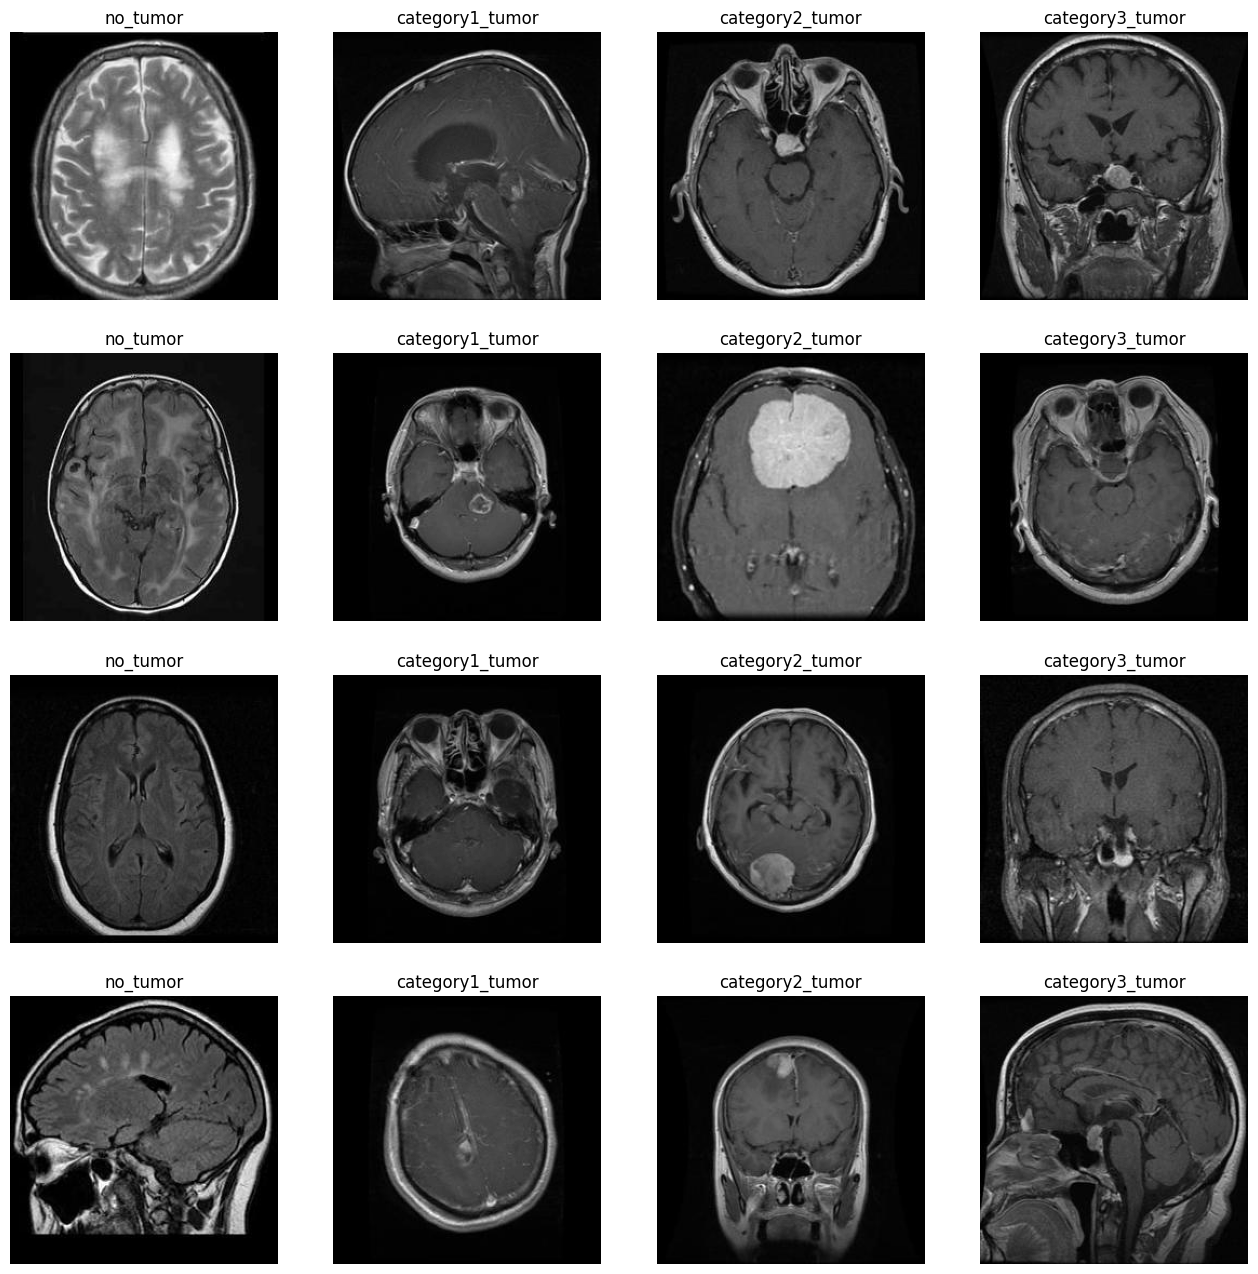

In [94]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

classes = ['no_tumor', 'category1_tumor', 'category2_tumor', 'category3_tumor']

for i in range(8):
    for class_name in classes:
        class_dir = os.path.join(train_dir, class_name)
        class_fnames = os.listdir(class_dir)

        img_path = os.path.join(class_dir, class_fnames[pic_index - 8 + i])

        subplot_index = i * len(classes) + classes.index(class_name) + 1
        if subplot_index <= ncols * nrows:
            sp = plt.subplot(nrows, ncols, subplot_index)
            sp.axis('Off')

            img = mpimg.imread(img_path)
            if len(img.shape) == 3 and img.shape[2] == 3:
                img = img.mean(axis=2)  # Convert color image to grayscale
            plt.imshow(img, cmap='gray')  # Display using grayscale colormap

            plt.title(class_name)

plt.show()


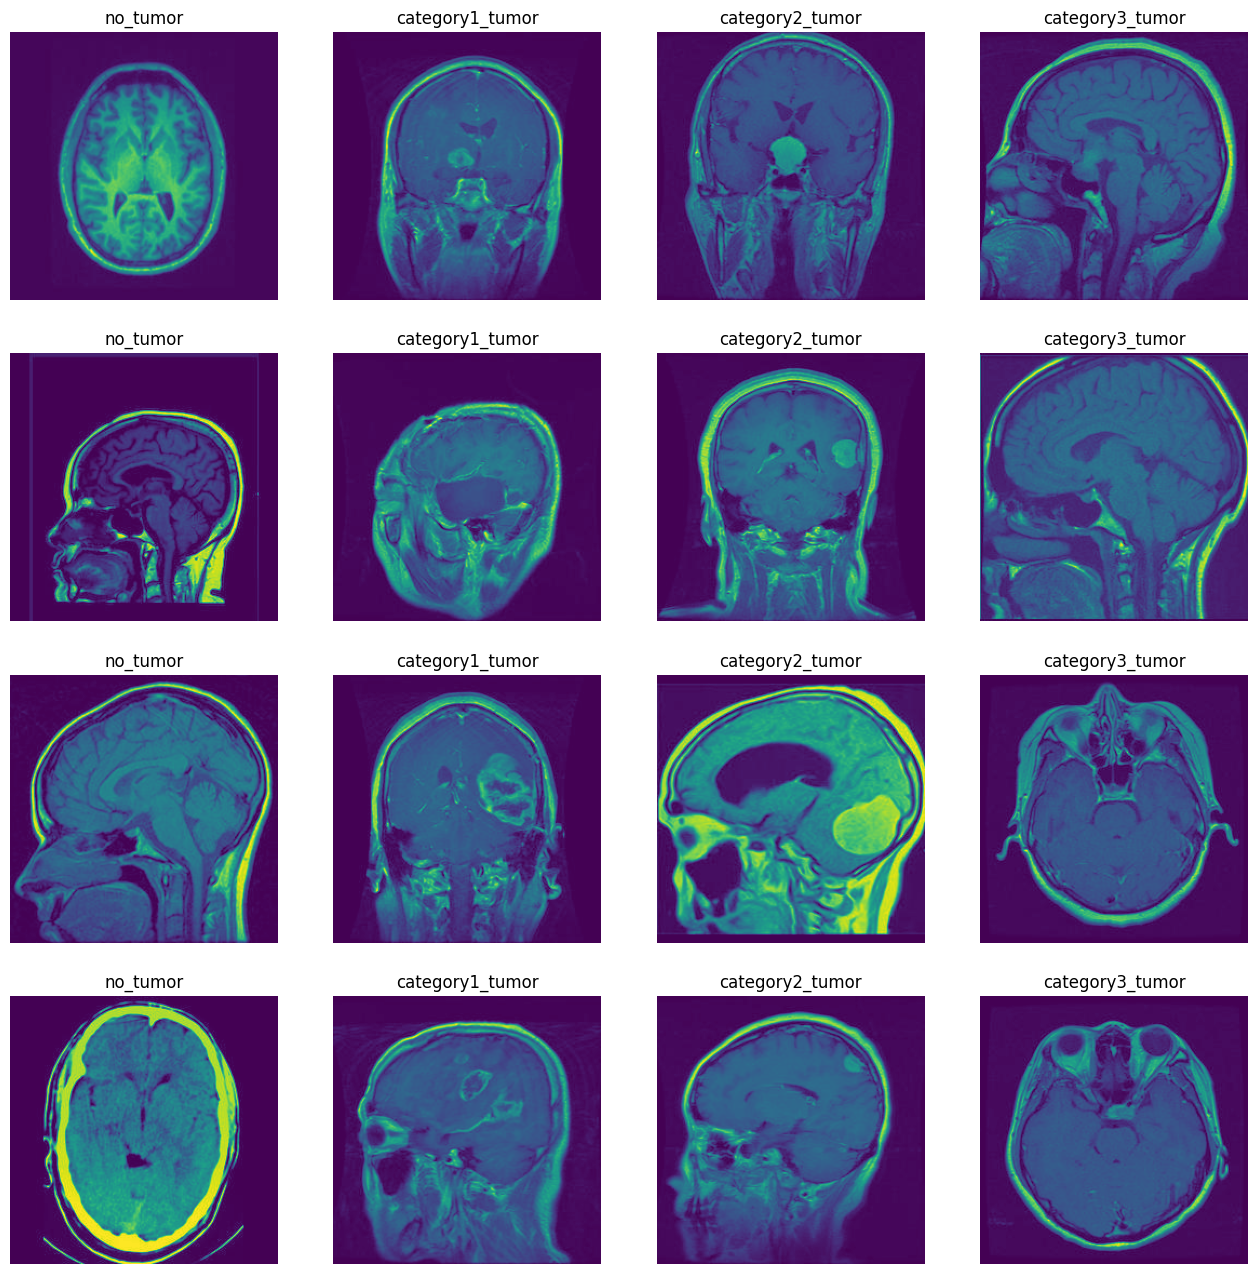

In [93]:
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index += 8

classes = ['no_tumor', 'category1_tumor', 'category2_tumor', 'category3_tumor']

for i in range(8):
    for class_name in classes:
        class_dir = os.path.join(train_dir, class_name)
        class_fnames = os.listdir(class_dir)

        img_path = os.path.join(class_dir, class_fnames[pic_index - 8 + i])

        subplot_index = i * len(classes) + classes.index(class_name) + 1
        if subplot_index <= ncols * nrows:
            sp = plt.subplot(nrows, ncols, subplot_index)
            sp.axis('Off')

            img = mpimg.imread(img_path)
            plt.imshow(img)

            plt.title(class_name)

plt.show()

In [11]:
# Collect all unique labels from the training and validation data
classes = []
for dirpath in [train_dir, validation_dir]:
    for dirname in os.listdir(dirpath):
        if not dirname.startswith('.'):
            classes.append(dirname)
classes = np.unique(classes)

In [12]:
print(classes)

['category1_tumor' 'category2_tumor' 'category3_tumor' 'no_tumor']


In [8]:
# Define the input shape and number of classes
input_shape = (248, 248, 1)
num_classes = 4

In [33]:
import tensorflow as tf

# Define your regularization strength
l2_reg = 0.001

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, kernel_regularizer=tf.keras.regularizers.l2(l2_reg)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(l2_reg)),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


In [40]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 246, 246, 32)      320       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 123, 123, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 121, 121, 64)      18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 60, 60, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 58, 58, 128)       73856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 29, 29, 128)     

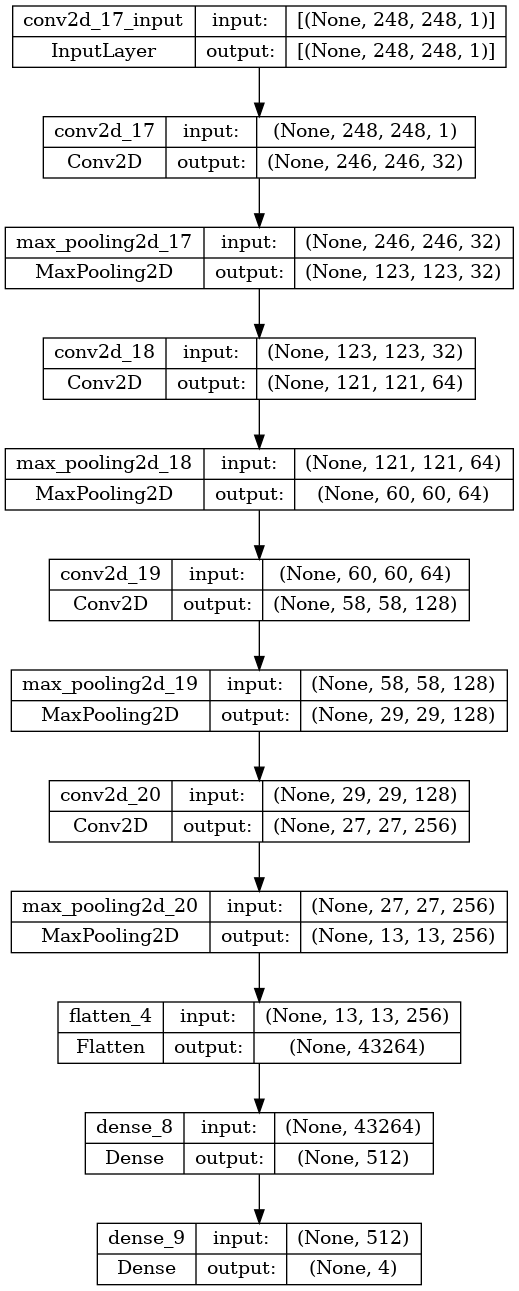

In [39]:
from tensorflow.keras.utils import plot_model

# Visualize the model architecture
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)


In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255.,horizontal_flip=True)
test_datagen  = ImageDataGenerator( rescale = 1.0/255.,horizontal_flip=True)

# --------------------
# Flow training images in batches of 32 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    color_mode='grayscale',
                                                    target_size=(248, 248))
# --------------------
# Flow validation images in batches of 32 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         class_mode='categorical',
                                                         color_mode='grayscale',
                                                         target_size=(248, 248))

Found 2910 images belonging to 4 classes.
Found 726 images belonging to 4 classes.


In [35]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [36]:
history = model.fit(
            train_generator,
            epochs=15,
            validation_data=validation_generator,
            verbose=2)

Epoch 1/15
91/91 - 3s - loss: 1.4596 - accuracy: 0.5216 - val_loss: 1.1106 - val_accuracy: 0.6350 - 3s/epoch - 34ms/step
Epoch 2/15
91/91 - 2s - loss: 0.9894 - accuracy: 0.6835 - val_loss: 0.9758 - val_accuracy: 0.6942 - 2s/epoch - 20ms/step
Epoch 3/15
91/91 - 2s - loss: 0.8809 - accuracy: 0.7216 - val_loss: 0.8265 - val_accuracy: 0.7548 - 2s/epoch - 20ms/step
Epoch 4/15
91/91 - 2s - loss: 0.7988 - accuracy: 0.7708 - val_loss: 0.8452 - val_accuracy: 0.7369 - 2s/epoch - 20ms/step
Epoch 5/15
91/91 - 2s - loss: 0.7346 - accuracy: 0.8007 - val_loss: 0.7382 - val_accuracy: 0.7934 - 2s/epoch - 20ms/step
Epoch 6/15
91/91 - 2s - loss: 0.6633 - accuracy: 0.8378 - val_loss: 0.6696 - val_accuracy: 0.8361 - 2s/epoch - 20ms/step
Epoch 7/15
91/91 - 2s - loss: 0.5789 - accuracy: 0.8766 - val_loss: 0.6583 - val_accuracy: 0.8375 - 2s/epoch - 20ms/step
Epoch 8/15
91/91 - 2s - loss: 0.5693 - accuracy: 0.8818 - val_loss: 0.6155 - val_accuracy: 0.8760 - 2s/epoch - 20ms/step
Epoch 9/15
91/91 - 2s - loss: 0.

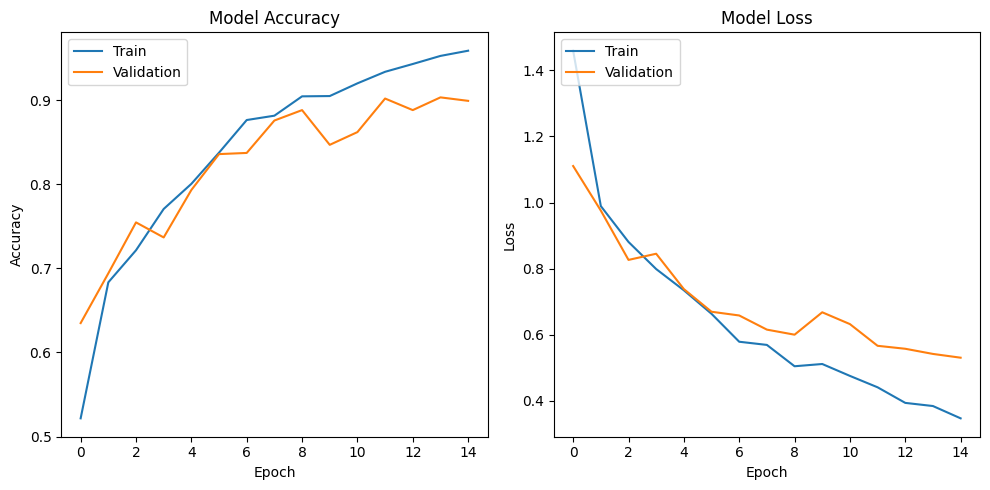

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [38]:
# Save the trained model in .h5 format
model.save('Model_Version_1.0.3.h5')